In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import  StandardScaler, OrdinalEncoder
import lightgbm as lgbm
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (accuracy_score,
                             roc_auc_score, 
                             roc_curve,
                             precision_score, 
                             recall_score, 
                             f1_score, 
                             classification_report, 
                             confusion_matrix)
from lightgbm import LGBMClassifier

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
chunk_size = 100000  # Adjust as needed
chunks = pd.read_csv('E:/Phat/data_electricity.csv', chunksize=chunk_size, low_memory=False, na_values='\\N')

data = pd.concat([chunk for chunk in chunks])


In [4]:
data.describe()

,id_chiso,id_bcs,hs_nhan,so_cto_chiso,ky,thang,nam,chiso_cu,chiso_moi,san_luong,sluong_ttiep,sluong_trphu,thd_le,sluong_1,sluong_2,sluong_3,ma_cto,so_cto_hso_cto,ma_cloai,so_pha,id_khang,id_ddo,kimua_cspk,csuat,so_cto_csuat_ddo,thang_csuat_ddo,gia_tri,fraud
count,2.017500e+07,2.017500e+07,2.017500e+07,2.017500e+07,2.017500e+07,2.017500e+07,2.017500e+07,2.017500e+07,2.017500e+07,2.017500e+07,20175000.0,2.017500e+07,20175000.0,2.017500e+07,2.017500e+07,2.017500e+07,2.017500e+07,2.017500e+07,2.017500e+07,2.017500e+07,2.017500e+07,2.017500e+07,2.017500e+07,2.017500e+07,2.017500e+07,2.017500e+07,2.017500e+07,2.017500e+07
mean,2.634681e+09,2.652765e+07,1.680951e+01,1.333025e+09,1.014925e+00,1.191320e+01,2.019008e+03,1.821111e+04,1.880866e+04,1.666911e+03,0.0,7.400914e-01,0.0,2.221861e+03,2.648947e+03,2.738096e+03,4.693302e+16,1.333025e+09,6.291521e+02,2.148357e+00,3.749437e+06,5.742536e+06,1.101995e-01,7.753928e+01,1.333025e+09,7.249781e+00,2.827820e+00,2.252916e-01
std,1.167876e+06,1.146157e+06,1.000637e+02,3.602326e+09,1.212536e-01,9.732482e-01,8.847711e-02,3.318370e+04,3.389165e+04,5.356966e+03,0.0,4.731027e+01,0.0,6.757458e+03,7.738003e+03,7.177863e+03,1.239382e+17,3.602326e+09,6.792960e+01,9.889339e-01,7.629042e+05,1.073745e+06,3.131383e-01,4.044526e+02,3.602326e+09,3.433104e+00,7.554344e+00,4.177742e-01
min,2.631517e+09,1.112710e+05,1.000000e+00,2.708000e+03,1.000000e+00,1.000000e+00,2.019000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,5.041997e+11,2.708000e+03,3.040000e+02,1.000000e+00,3.464800e+06,5.306346e+06,0.000000e+00,0.000000e+00,2.708000e+03,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.633775e+09,2.592196e+07,1.000000e+00,1.419971e+07,1.000000e+00,1.200000e+01,2.019000e+03,2.219000e+03,2.432000e+03,1.350000e+02,0.0,0.000000e+00,0.0,1.860000e+02,2.140000e+02,2.380000e+02,6.362011e+14,1.419971e+07,5.810000e+02,1.000000e+00,3.512371e+06,5.358038e+06,0.000000e+00,0.000000e+00,1.419971e+07,5.000000e+00,0.000000e+00,0.000000e+00
50%,2.635100e+09,2.660424e+07,1.000000e+00,1.825878e+07,1.000000e+00,1.200000e+01,2.019000e+03,7.541000e+03,7.871000e+03,3.510000e+02,0.0,0.000000e+00,0.0,4.700000e+02,5.670000e+02,6.430000e+02,7.722009e+14,1.825878e+07,6.040000e+02,3.000000e+00,3.520924e+06,5.369957e+06,0.000000e+00,1.000000e+01,1.825878e+07,8.000000e+00,0.000000e+00,0.000000e+00
75%,2.635718e+09,2.739154e+07,1.000000e+00,1.612743e+09,1.000000e+00,1.200000e+01,2.019000e+03,1.931300e+04,1.992600e+04,1.150000e+03,0.0,0.000000e+00,0.0,1.770000e+03,2.052000e+03,2.316000e+03,5.802016e+16,1.612743e+09,6.420000e+02,3.000000e+00,3.554923e+06,5.413200e+06,0.000000e+00,3.100000e+01,1.612743e+09,1.000000e+01,0.000000e+00,0.000000e+00
max,2.636150e+09,2.868030e+07,8.000000e+03,1.812008e+10,2.000000e+00,1.200000e+01,2.020000e+03,5.219480e+05,5.356360e+05,2.331000e+05,0.0,7.800000e+03,0.0,3.239000e+05,3.239000e+05,2.741000e+05,6.392017e+17,1.812008e+10,8.050000e+02,3.000000e+00,6.508863e+06,9.151316e+06,1.000000e+00,1.000000e+04,1.812008e+10,1.200000e+01,1.600000e+02,1.000000e+00


In [5]:
data.isnull().sum()

ma_dviqly                      0
id_chiso                       0
id_bcs                         0
ma_dvictren                    0
ma_ddo                         0
bcs_chiso                      0
hs_nhan                        0
so_cto_chiso                   0
ky                             0
thang                          0
nam                            0
chiso_cu                       0
chiso_moi                      0
san_luong                      0
sluong_ttiep                   0
sluong_trphu                   0
loai_chiso                     0
thd_le                         0
ma_ttcto                20005598
ngay_dky                       0
ngay_cky                       0
sluong_1                       0
sluong_2                       0
sluong_3                       0
ngay_tao_chiso                 0
nguoi_tao_chiso                0
ngay_sua_chiso                 0
nguoi_sua_chiso                0
ma_cnang_chiso                 0
so_cot                  20099328
so_hop    

In [6]:
data.dtypes

ma_dviqly                object
id_chiso                  int64
id_bcs                    int64
ma_dvictren              object
ma_ddo                   object
bcs_chiso                object
hs_nhan                 float64
so_cto_chiso              int64
ky                        int64
thang                     int64
nam                       int64
chiso_cu                float64
chiso_moi               float64
san_luong                 int64
sluong_ttiep              int64
sluong_trphu              int64
loai_chiso               object
thd_le                    int64
ma_ttcto                 object
ngay_dky                 object
ngay_cky                 object
sluong_1                  int64
sluong_2                  int64
sluong_3                  int64
ngay_tao_chiso           object
nguoi_tao_chiso          object
ngay_sua_chiso           object
nguoi_sua_chiso          object
ma_cnang_chiso           object
so_cot                   object
so_hop                   object
ma_tram 

In [7]:
for col in data.select_dtypes(include=['float64']).columns:
    data[col] = data[col].astype(np.float32)

for col in data.select_dtypes(include=['int64']).columns:
    data[col] = data[col].astype(np.int32)


In [8]:
data['fraud'].value_counts()

fraud
0    15629742
1     4545258
Name: count, dtype: int64

In [9]:
missing_value_cols = ['ma_ttcto', 'so_cot', 'so_hop', 'ngay_hhluc_vitri_ddo', 
                      'ngay_hhluc_khang','ngay_hhluc_diemdo', 'ngay_hhluc']
for col in missing_value_cols:
    data[col].fillna("Missing", inplace=True)

In [10]:
numerical_cols = ['id_chiso','id_bcs','hs_nhan','so_cto_chiso','ky','thang','nam',
                  'chiso_cu','chiso_moi','san_luong','sluong_ttiep','sluong_trphu',
                   'thd_le','sluong_1','sluong_2','sluong_3','ma_cto','so_cto_hso_cto',
                    'ma_cloai','so_pha','id_khang','id_ddo','kimua_cspk','csuat','so_cto_csuat_ddo',
                     'thang_csuat_ddo','gia_tri' ]

scaler = StandardScaler()
for col in numerical_cols:
    data[col] = scaler.fit_transform(data[[col]])


In [11]:
target = 'fraud'
cat_cols = ['ma_dviqly','ma_dvictren','ma_ddo','bcs_chiso','loai_chiso',
            'ma_ttcto','ngay_dky','ngay_cky','ngay_tao_chiso','nguoi_tao_chiso',
            'ngay_sua_chiso','nguoi_sua_chiso','ma_cnang_chiso','so_cot','so_hop',
            'ma_tram','ngay_hluc_vitri_ddo','ngay_hhluc_vitri_ddo','ngay_bdong',
            'ngay_kdinh','ma_bdong','dong_dien','dien_ap','vh_cong','ten_khang',
            'ma_khang','ngay_hluc_khang','ngay_hhluc_khang','dia_chi','ngay_hluc_diem_do',
            'ngay_hhluc_diemdo','loai_giatri','ngay_hluc','ngay_hhluc']

oe = OrdinalEncoder()
for col in cat_cols:
    data[col] = data[col].astype('category').cat.codes



In [12]:
data.head()

,ma_dviqly,id_chiso,id_bcs,ma_dvictren,ma_ddo,bcs_chiso,hs_nhan,so_cto_chiso,ky,thang,nam,chiso_cu,chiso_moi,san_luong,sluong_ttiep,sluong_trphu,loai_chiso,thd_le,ma_ttcto,ngay_dky,ngay_cky,sluong_1,sluong_2,sluong_3,ngay_tao_chiso,nguoi_tao_chiso,ngay_sua_chiso,nguoi_sua_chiso,ma_cnang_chiso,so_cot,so_hop,ma_tram,ngay_hluc_vitri_ddo,ngay_hhluc_vitri_ddo,ma_cto,so_cto_hso_cto,ngay_bdong,ngay_kdinh,ma_bdong,dong_dien,dien_ap,vh_cong,ma_cloai,so_pha,id_khang,ten_khang,ma_khang,ngay_hluc_khang,ngay_hhluc_khang,dia_chi,ngay_hluc_diem_do,ngay_hhluc_diemdo,id_ddo,kimua_cspk,csuat,so_cto_csuat_ddo,thang_csuat_ddo,loai_giatri,gia_tri,ngay_hluc,ngay_hhluc,fraud
0,0,0.399556,-1.732109,0,34973,5,-0.157994,1.203375,-0.123091,0.089181,-0.089181,-0.120575,-0.126068,-0.250312,0.0,-0.015643,0,0.0,0,5,29,-0.274787,-0.284433,-0.321418,2865,5,3314,5,2,8,627,119,344,845,0.011082,1.203375,19,87,1,8,2,0,-0.753017,-1.161207,-0.354022,20062,34355,385,884,8039,345,1103,-0.397237,-0.35192,-0.191714,1.203375,1.092370,0,-0.37433,0,275,0
1,0,0.399556,-1.732109,0,34973,5,-0.157994,1.203375,-0.123091,0.089181,-0.089181,-0.120575,-0.126068,-0.250312,0.0,-0.015643,0,0.0,0,5,29,-0.274787,-0.284433,-0.321418,2865,5,3314,5,2,8,627,119,344,845,0.011082,1.203375,19,87,1,8,2,0,-0.753017,-1.161207,-0.354022,20062,34355,385,884,8039,345,1103,-0.397237,-0.35192,-0.191714,1.203375,1.383651,0,-0.37433,0,275,0
2,0,0.399556,-1.732109,0,34973,5,-0.157994,1.203375,-0.123091,0.089181,-0.089181,-0.120575,-0.126068,-0.250312,0.0,-0.015643,0,0.0,0,5,29,-0.274787,-0.284433,-0.321418,2865,5,3314,5,2,8,627,119,344,845,0.011082,1.203375,19,87,1,8,2,0,-0.753017,-1.161207,-0.354022,20062,34355,385,884,8039,345,1103,-0.397237,-0.35192,-0.191714,1.203375,-1.820446,0,-0.37433,0,275,0
3,0,0.399556,-1.732109,0,34973,5,-0.157994,1.203375,-0.123091,0.089181,-0.089181,-0.120575,-0.126068,-0.250312,0.0,-0.015643,0,0.0,0,5,29,-0.274787,-0.284433,-0.321418,2865,5,3314,5,2,8,627,119,344,845,0.011082,1.203375,19,87,1,8,2,0,-0.753017,-1.161207,-0.354022,20062,34355,385,884,8039,345,1103,-0.397237,-0.35192,-0.191714,1.203375,-1.529165,0,-0.37433,0,275,0
4,0,0.399556,-1.732109,0,34973,5,-0.157994,1.203375,-0.123091,0.089181,-0.089181,-0.120575,-0.126068,-0.250312,0.0,-0.015643,0,0.0,0,5,29,-0.274787,-0.284433,-0.321418,2865,5,3314,5,2,8,627,119,344,845,0.011082,1.203375,19,87,1,8,2,0,-0.753017,-1.161207,-0.354022,20062,34355,385,884,8039,345,1103,-0.397237,-0.35192,-0.191714,1.203375,-1.237883,0,-0.37433,0,275,0


CHIA TAP DU LIEU 
train : val : test = 6:2:2

In [13]:
target = 'fraud'
X = data.drop(columns=[target])
y = data[target]


X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)

# XGB

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Tạo custom transformer để thực hiện oversampling và undersampling
class ResampleTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, oversampler, undersampler):
        self.oversampler = oversampler
        self.undersampler = undersampler

    def fit(self, X, y):
        # Không cần fit gì ở đây, chỉ cần trả về chính X, y
        return self

    def transform(self, X, y=None):
        # Áp dụng oversampling rồi đến undersampling nếu y không phải None
        if y is not None:
            X_res, y_res = self.oversampler.fit_resample(X, y)
            X_res, y_res = self.undersampler.fit_resample(X_res, y_res)
            return X_res, y_res
        return X  # Nếu y là None, chỉ trả về X


In [16]:
SEED = 42   
xgb_params = {
    # 'enable_categorical': True,
    'tree_method':        'hist',
    'random_state':       SEED,
    'learning_rate':      0.08501257473292347,
    'lambda':             8.879624125465703,
    'alpha':              0.6779926606782505,
    'max_depth':          6,
    'subsample':          0.6012681388711075,
    'colsample_bytree':   0.8437772277074493,
    'colsample_bylevel':  0.5476090898823716,
    'colsample_bynode':   0.9928601203635129,
    'scale_pos_weight':   3.29440313334688,
}

lgb_params = {
    'objective':        'binary',
    'verbosity':        -1,
    'n_iter':           200,
    'boosting_type':    'gbdt',
    'random_state':     SEED,
    'lambda_l1':        0.08758718919397321,
    'lambda_l2':        0.0039689175176025465,
    'learning_rate':    0.03231007103195577,
    'max_depth':        4,
    'num_leaves':       103,
    'colsample_bytree': 0.8329551585827726,
    'colsample_bynode': 0.4025961355653304,
    'bagging_fraction': 0.7738954452473223,
    'bagging_freq':     4,
    'min_data_in_leaf': 85,
    'scale_pos_weight': 2.7984184778875543,
    # 'device': 'gpu'
}

cb_params = {
    'loss_function':     'Logloss',
    'iterations':        250,
    'verbose':           False,
    'random_state':      SEED,
    'max_depth':         7,
    'learning_rate':     0.06936242010150652,
    'scale_pos_weight':  2.6149345838209532,
    'l2_leaf_reg':       6.216113851699493,
    'subsample':         0.6249261779711819,
    'min_data_in_leaf':  24,
    # 'cat_features':      cat_cols,
}

# Tạo pipeline với resampling
oversampler = RandomOverSampler(sampling_strategy=0.03, random_state=SEED)
undersampler = RandomUnderSampler(sampling_strategy=0.03, random_state=SEED)

# # Tạo pipeline với oversampling và undersampling
# augmentation = Pipeline([
#     ('oversample', oversampler),
#     ('undersample', undersampler)
# ])

# # Áp dụng resampling vào tập huấn luyện
# X_train_resampled, y_train_resampled = augmentation.fit_resample(X_train, y_train)

# # In ra số lượng nhãn 0 và 1 sau khi resampling
# print("After resampling:")
# print("Count of label 0:", np.sum(y_train_resampled == 0))
# print("Count of label 1:", np.sum(y_train_resampled == 1))

In [17]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
SEED = 42
X = X_temp
y=y_temp
# Sử dụng StratifiedKFold để đảm bảo tỷ lệ lớp
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=SEED)

# Tính toán scale_pos_weight để xử lý mất cân bằng dữ liệu
class_imbalance_ratio = sum(y == 0) / sum(y == 1)
scale_pos_weight = class_imbalance_ratio  # Tỷ lệ giữa lớp âm và lớp dương

# Khởi tạo mô hình CatBoost với các siêu tham số tốt nhất
model = xgb.XGBClassifier(**xgb_params)

# Khởi tạo các phương pháp resampling
oversampler = RandomOverSampler(sampling_strategy=0.03, random_state=SEED)
undersampler = RandomUnderSampler(sampling_strategy=0.03, random_state=SEED)

# Tạo pipeline hoàn chỉnh sử dụng custom transformer
full_pipeline = Pipeline([
    ('resample', ResampleTransformer(oversampler, undersampler)),
    ('model', model)
])
# Định nghĩa hàm custom metric
def custom_metric(estimator, X, y_true):
    y_hat = estimator.predict_proba(X)[:, 1]
    min_tpr = 0.80
    max_fpr = abs(1 - min_tpr)
    
    v_gt = abs(y_true - 1)
    v_pred = np.array([1.0 - x for x in y_hat])
    
    partial_auc_scaled = roc_auc_score(v_gt, v_pred, max_fpr=max_fpr)
    partial_auc = 0.5 * max_fpr**2 + (max_fpr - 0.5 * max_fpr**2) / (1.0 - 0.5) * (partial_auc_scaled - 0.5)
    
    return partial_auc

# Đánh giá mô hình bằng cross-validation với custom transformer
print("Performing cross-validation with Augmentation...")
cross_val_results = cross_validate(
    full_pipeline,
    X,
    y,
    cv=skf,
    scoring=custom_metric,
    verbose=1
)

# In ra kết quả cross-validation
print(f'Cross-validation pAUC scores: {cross_val_results["test_score"]}')
print(f'Mean pAUC: {cross_val_results["test_score"].mean():.4f}, Std: {cross_val_results["test_score"].std():.4f}')

# Huấn luyện mô hình cuối cùng trên toàn bộ dữ liệu
print("Training final model on the entire combined dataset...")
full_pipeline.fit(X, y)

Performing cross-validation with Augmentation...


c:\Users\HOME\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 2.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HOME\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HOME\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HOME\AppData\Local

Cross-validation pAUC scores: [0.19999472        nan]
Mean pAUC: nan, Std: nan
Training final model on the entire combined dataset...


XGBoostError: [01:29:08] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\common\io.h:320: bad_malloc: Failed to allocate 984540000 bytes.

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   3125948
           1       1.00      1.00      1.00    909052

    accuracy                           1.00   4035000
   macro avg       1.00      1.00      1.00   4035000
weighted avg       1.00      1.00      1.00   4035000



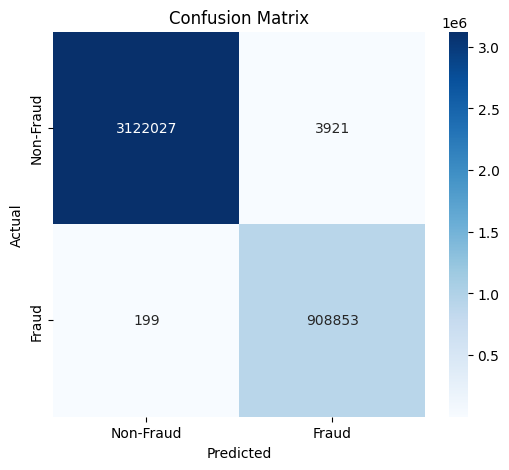

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dự đoán trên tập test
X_test = X_test
y_pred = full_pipeline.predict(X_test)

# Đánh giá mô hình với classification report và confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Vẽ confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Định nghĩa độ đo tùy chỉnh (Partial AUC)
def custom_metric(y_true, y_pred_proba):
    min_tpr = 0.80  # Ngưỡng TPR tối thiểu
    max_fpr = abs(1 - min_tpr)  # Ngưỡng FPR tối đa
    
    v_gt = abs(y_true - 1)  # Chuyển đổi y_true thành lớp tích cực (1) và lớp tiêu cực (0)
    v_pred = np.array([1.0 - x for x in y_pred_proba])  # Chuyển đổi xác suất dự đoán thành lớp tiêu cực
    
    partial_auc_scaled = roc_auc_score(v_gt, v_pred, max_fpr=max_fpr)  # Tính AUC của phần có FPR giới hạn
    partial_auc = 0.5 * max_fpr**2 + (max_fpr - 0.5 * max_fpr**2) / (1.0 - 0.5) * (partial_auc_scaled - 0.5)  # Điều chỉnh AUC

    return partial_auc

# Lấy xác suất dự đoán của lớp tích cực (Fraud)
y_pred_proba = full_pipeline.predict_proba(X_test)[:, 1]  # Dự đoán xác suất lớp tích cực (Fraud)

# Tính độ đo tùy chỉnh trên tập test
custom_auc_score = custom_metric(y_test, y_pred_proba)

# In kết quả độ đo tùy chỉnh
print(f'Custom pAUC Score: {custom_auc_score}')
print(f'AUC Score: {roc_auc_score(y_test, y_pred_proba)}')

Custom pAUC Score: 0.19999578226733364
AUC Score: 0.9999957822673337


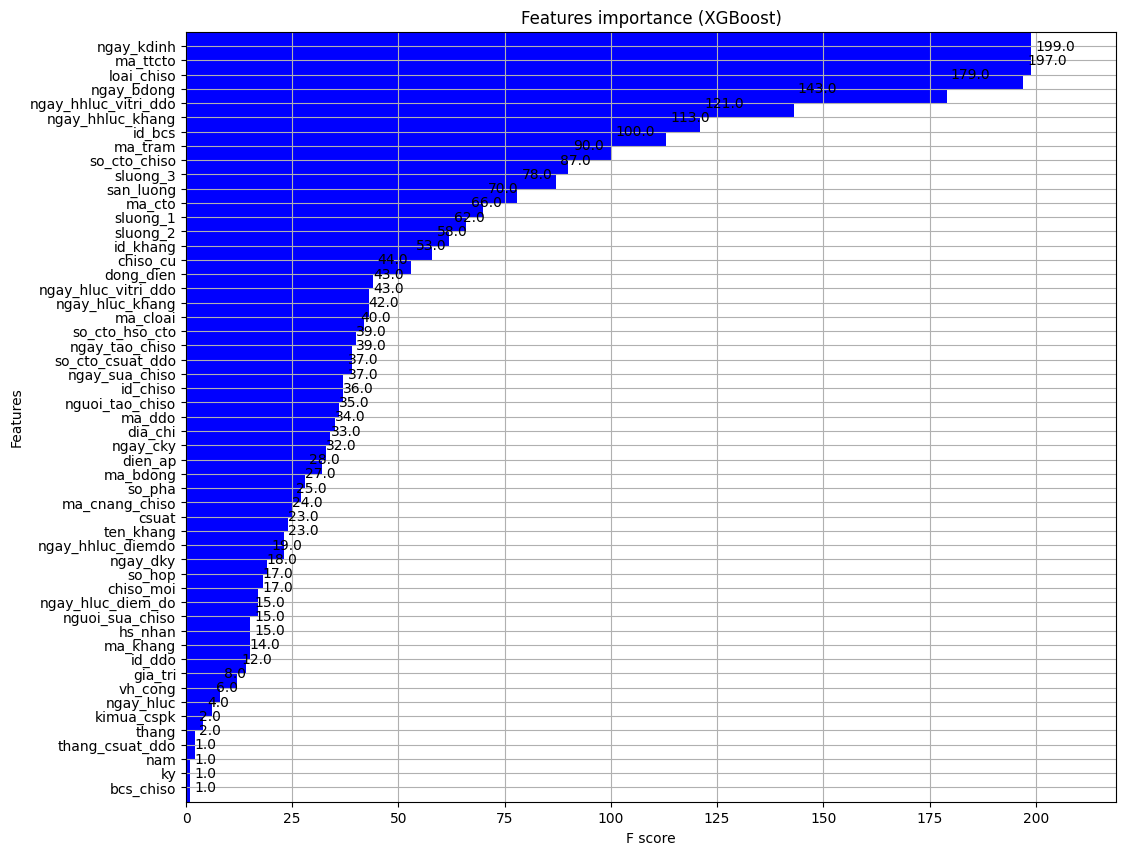

In [ ]:
import matplotlib.pyplot as plt
fig, (ax) = plt.subplots(ncols=1, figsize=(12,10))

xgb.plot_importance(model, title="Features importance (XGBoost)" ,height=4, ax=ax,  color='blue')
plt.show()

In [ ]:
# Đếm số lượng mẫu mỗi lớp trong tập train, val và test
def count_class_distribution(y, name=""):
    fraud_count = (y == 1).sum()
    nonfraud_count = (y == 0).sum()
    print(f"{name} set:")
    print(f"  Fraud     (1): {fraud_count}")
    print(f"  Non-Fraud (0): {nonfraud_count}")
    print("-" * 40)

count_class_distribution(y_train, "TRAIN")
count_class_distribution(y_val, "VALIDATION")
count_class_distribution(y_test, "TEST")


TRAIN set:
  Fraud     (1): 2727155
  Non-Fraud (0): 9377845
----------------------------------------
VALIDATION set:
  Fraud     (1): 909051
  Non-Fraud (0): 3125949
----------------------------------------
TEST set:
  Fraud     (1): 909052
  Non-Fraud (0): 3125948
----------------------------------------


In [ ]:
import matplotlib.pyplot as plt
# Lấy mẫu 100,000 dòng
data_sample = data.sample(n=100000, random_state=42)

# Tính ma trận tương quan trên mẫu
corr_matrix = data_sample.corr(numeric_only=True)

# Vẽ heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap (Sampled Data 1M record)")
plt.show()


NameError: name 'sns' is not defined

<Figure size 1600x1200 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import gc

# ---------- 1. Cấu hình & đọc dữ liệu theo chunks ----------
CSV_PATH = 'E:/Phat/data_electricity.csv'
CHUNK_SIZE = 200_000  # đọc 200k dòng/lần

# list tạm để chứa từng chunk đã chuyển dtype
chunks = []
for chunk in pd.read_csv(CSV_PATH, 
                         chunksize=CHUNK_SIZE, 
                         low_memory=False, 
                         na_values='\\N'):
    # cast float64 → float32, int64 → int32
    for c in chunk.select_dtypes(include=['float64']).columns:
        chunk[c] = chunk[c].astype(np.float32)
    for c in chunk.select_dtypes(include=['int64']).columns:
        chunk[c] = chunk[c].astype(np.int32)
    chunks.append(chunk)
    # giải phóng bộ nhớ ngay sau khi thêm
    gc.collect()

# nối tất cả lại
data = pd.concat(chunks, ignore_index=True)
del chunks
gc.collect()

# ---------- 2. Xử lý missing & scaling & encoding ----------
# 2.1 Fill các cột missing bằng 'Missing'
missing_cols = [
    'ma_ttcto','so_cot','so_hop','ngay_hhluc_vitri_ddo',
    'ngay_hhluc_khang','ngay_hhluc_diemdo','ngay_hhluc'
]
for c in missing_cols:
    if c in data.columns:
        data[c].fillna('Missing', inplace=True)

# 2.2 Scale các cột số
num_cols = [
    'id_chiso','id_bcs','hs_nhan','so_cto_chiso','ky','thang','nam',
    'chiso_cu','chiso_moi','san_luong','sluong_ttiep','sluong_trphu',
    'thd_le','sluong_1','sluong_2','sluong_3','ma_cto',
    'so_cto_hso_cto','ma_cloai','so_pha','id_khang','id_ddo',
    'kimua_cspk','csuat','so_cto_csuat_ddo',
    'thang_csuat_ddo','gia_tri'
]
# chỉ scale khi cột tồn tại
exist_num = [c for c in num_cols if c in data.columns]
scaler = StandardScaler()
data[exist_num] = scaler.fit_transform(data[exist_num])

# 2.3 Encode categorical thành integer codes
cat_cols = [
    'ma_dviqly','ma_dvictren','ma_ddo','bcs_chiso','loai_chiso',
    'ma_ttcto','ngay_dky','ngay_cky','ngay_tao_chiso','nguoi_tao_chiso',
    'ngay_sua_chiso','nguoi_sua_chiso','ma_cnang_chiso','so_cot','so_hop',
    'ma_tram','ngay_hluc_vitri_ddo','ngay_hhluc_vitri_ddo','ngay_bdong',
    'ngay_kdinh','ma_bdong','dong_dien','dien_ap','vh_cong','ten_khang',
    'ma_khang','ngay_hluc_khang','ngay_hhluc_khang','dia_chi',
    'ngay_hluc_diem_do','ngay_hhluc_diemdo','loai_giatri','ngay_hluc',
    'ngay_hhluc'
]
for c in cat_cols:
    if c in data.columns:
        data[c] = data[c].astype('category').cat.codes

# ---------- 3. Tách train/val/test ----------
TARGET = 'fraud'
X = data.drop(columns=TARGET)
y = data[TARGET]
del data
gc.collect()

# stratify để giữ tỷ lệ fraud ~1.2%
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)
del X_temp, y_temp
gc.collect()

# ---------- 4. Tính scale_pos_weight ----------
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos
print(f"Scale_pos_weight = {scale_pos_weight:.2f}")

# ---------- 5. Khởi tạo DMatrix & params XGBoost ----------
dtrain = xgb.DMatrix(X_train, label=y_train)
dval   = xgb.DMatrix(X_val,   label=y_val)
dtest  = xgb.DMatrix(X_test,  label=y_test)

params = {
    'objective':        'binary:logistic',
    'eval_metric':      'auc',
    'scale_pos_weight': scale_pos_weight,
    'max_depth':        4,
    'eta':              0.1,
    'subsample':        0.8,
    'colsample_bytree': 0.8,
    'lambda':           1,
    'alpha':            0,
    'seed':             42,
    'tree_method':      'hist'
}

# ---------- 6. Huấn luyện với early stopping ----------
watchlist = [(dtrain, 'train'), (dval, 'eval')]
model = xgb.train(params,
                  dtrain,
                  num_boost_round=500,
                  evals=watchlist,
                  early_stopping_rounds=20,
                  verbose_eval=20)

# ---------- 7. Đánh giá trên Test set ----------
y_pred_prob = model.predict(dtest, ntree_limit=model.best_ntree_limit)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

print("Test ROC AUC:", roc_auc_score(y_test, y_pred_prob))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


KeyboardInterrupt: 